In [1]:
import matplotlib.pyplot as plt
import numpy as np
import m4_helpers
from scipy.optimize import curve_fit
from pylbm import lbm

In [16]:
x_dim, y_dim = 100, 80
epochs = 10000
top_vel = 1
omega = 1
velocities = m4_helpers.m4_1(x_dim=x_dim, y_dim=y_dim, epochs=epochs, omega=omega, top_vel=top_vel)

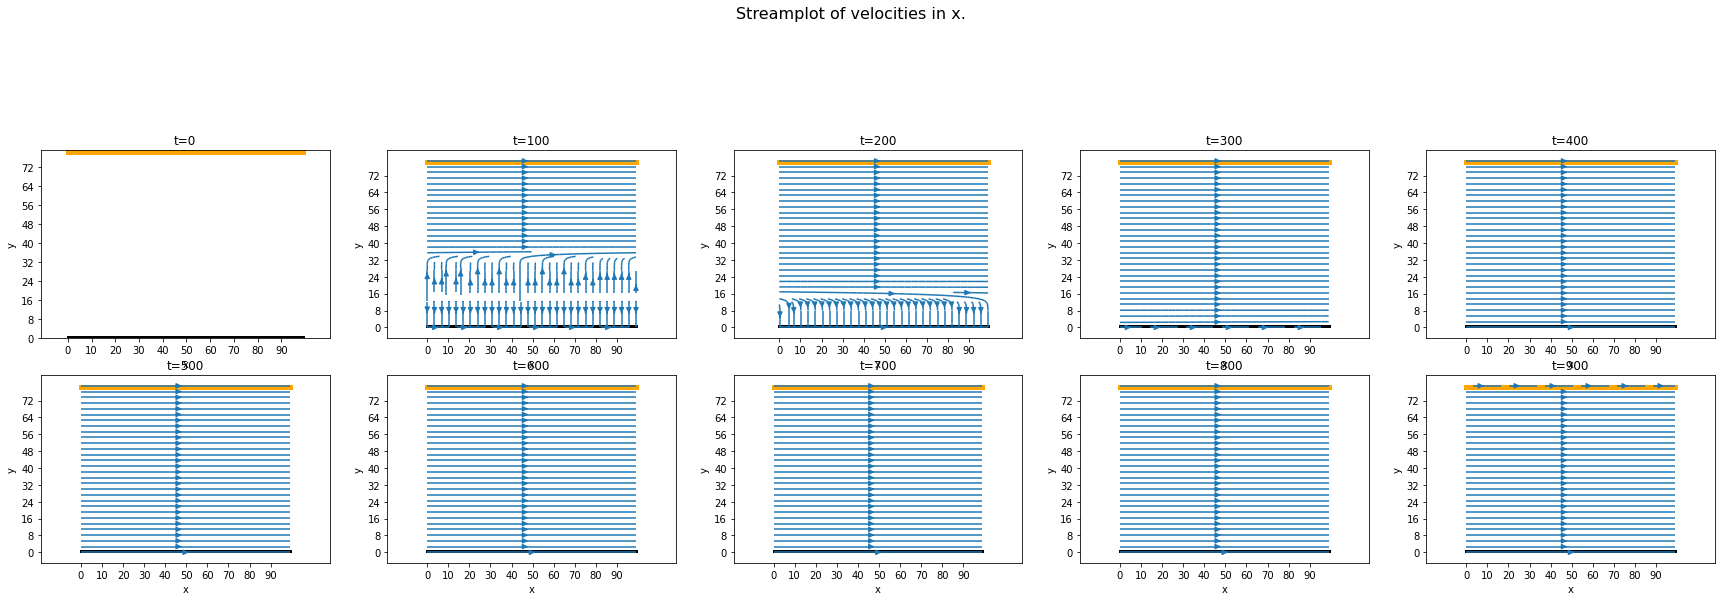

In [5]:
fig = plt.figure(figsize=(30,20))
plt.axis('off')
fig = m4_helpers.m4_1_fig(fig, x_dim=x_dim, y_dim=y_dim, velocities=velocities[:1000], num_plots=10)
fig.suptitle("Streamplot of velocities in x.", fontsize=16)
plt.show()
plt.close()

### We know that moving top wall is working if top particles have same velocity as wall

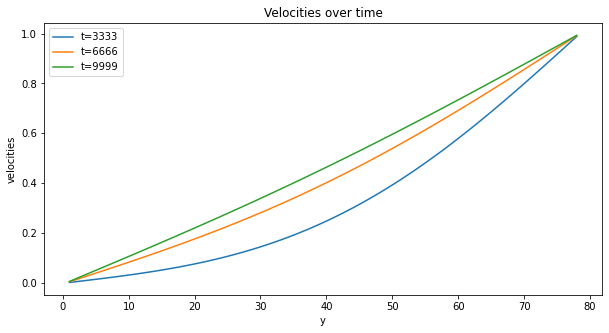

In [17]:
# Plot all velocitities along y
fig = plt.figure(figsize=(10,5))
ax = fig.subplots()
ax.set_title("Velocities over time")
num_plots = 5
for i in range(int(len(velocities)/num_plots), len(velocities), int(len(velocities)/num_plots)):
    # print(vel_clean)
    v=velocities[i]
    ax.plot(np.arange(y_dim-2)+1, v[0,0,1:-1], label="t={}".format(i))
ax.set_ylabel("velocities")
ax.set_xlabel("y")
# ax.set_xticks(np.arange(int(y_dim/10)+1)*10)
ax.legend()
plt.show()
plt.close()

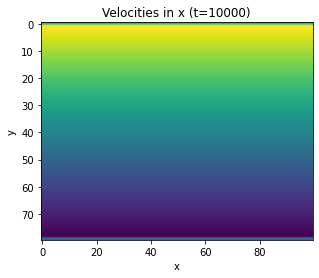

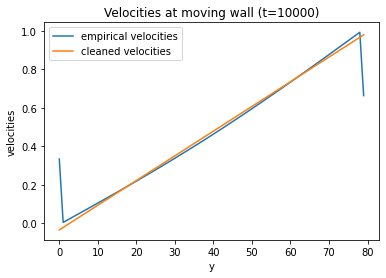

In [21]:
fig = plt.figure(figsize=(6,4))
ax = fig.subplots()
ax.set_title("Velocities in x (t={})".format(epochs))
u_aij_max = velocities[-1]
ax.set_ylabel("y")
ax.set_xlabel("x")
plt.imshow(np.rot90(velocities[-1][0,:,:]))
plt.show()
plt.close()

# Walls
# Because the walls are at 0.5 and y_dim - 0.5 we have to take the values from here and plot them.
fig = plt.figure(figsize=(6,4))
ax = fig.subplots()
ax.set_title("Velocities at moving wall (t={})".format(epochs))

def func(x, a, b):
    return a * x + b
popt, pcov = curve_fit(func, np.arange(y_dim-2)+1, u_aij_max[0,0,1:-1])
vel_clean = popt[0]*(np.arange(y_dim) + 0.0) + popt[1]
# vel_clean = popt[0]*(np.arange(y_dim) + 0.5) + popt[1]
# ax.set_xticks(np.arange(y_dim))
ax.plot(np.arange(y_dim), u_aij_max[0,0,:], label="empirical velocities")
ax.plot(np.arange(y_dim), vel_clean, label="cleaned velocities")
ax.set_xlabel("y")
ax.set_ylabel("velocities")
ax.legend()
plt.show()
plt.close()


# Walls
Because the walls are at 0.5 and y_dim - 0.5 we have to take the values from here and plot them.

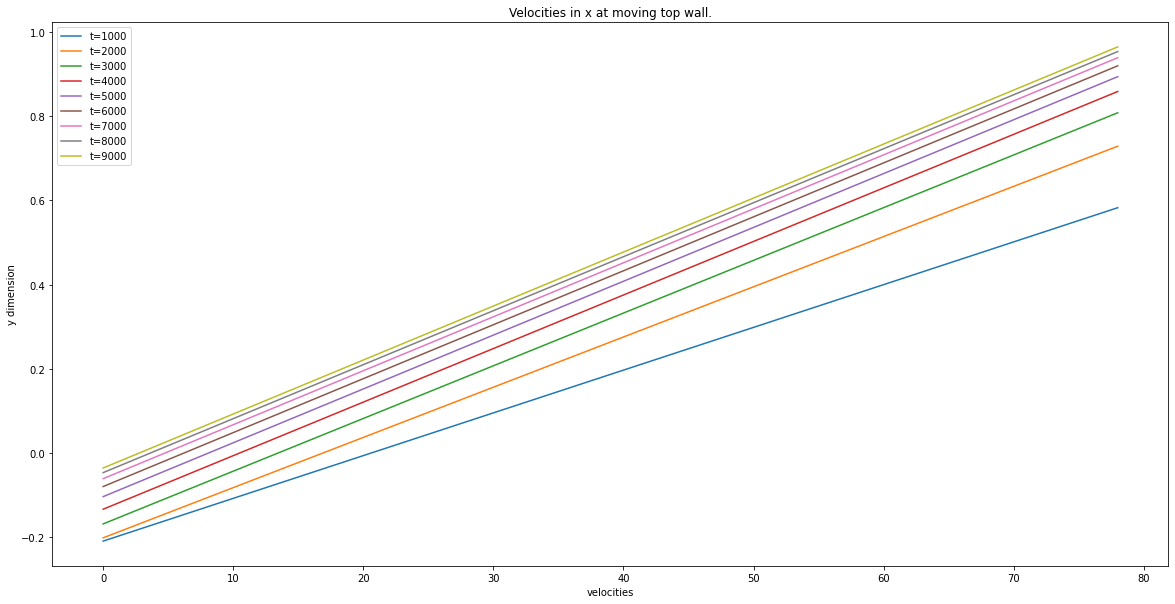

: 

In [23]:
fig = plt.figure(figsize=(20,10))
ax = fig.subplots()
ax.set_title("Velocities in x at moving top wall.")
for i in range(int(len(velocities)/10),len(velocities),int(len(velocities)/10)):
# for v in velocities[:6]:
    def func(x, a, b):
        return a * x + b
    popt, pcov = curve_fit(func, np.arange(y_dim-2)+1, velocities[i][0,0,1:-1])
    # print(popt[1])
    # print(popt[0])
    vel_clean = popt[0]*(np.arange(y_dim-1) + 0.5) + popt[1]
    # print(vel_clean)
    ax.plot(np.arange(y_dim-1), vel_clean, label="t={}".format(i))
ax.set_xlabel("velocities")
ax.set_ylabel("y dimension")
ax.legend()
plt.show()
plt.close()


# Appendix

From here not relevant for m4.

Just notes from lecture.

### Reynoldsnumber
Divides the stable and unstable purturbations like turbulance.

If larger than 1 the system could show instability and turbulance.

For sliding lid in most work choose a reynoldsnumber ~1000. 

- Gives idea of what our outcome should look like.
- use 300 grid points as $R_e = 340/10 * l = 3.4 * 300 = 1000$ (theoretically derived with certrain omega)

Re is indicator that I am in the flow regime where simulation conforms to "normal" circumstances


In [ ]:
lbm.reynolds(y_dim=y_dim, omega=omega,top_vel=top_vel)

960.0

### Diffusion constant phi

Set to 1


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
phi = np.zeros(100)
phi[49] = 1.
D = 1.0
dx = 1.
dt = 0.1
phi0 = phi

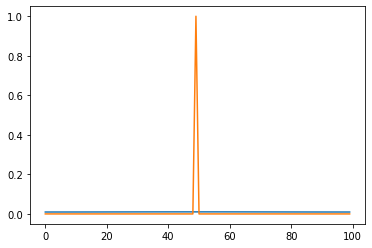

In [33]:
for i in range (10000):
    phi = phi + D*dt/dx**2*(np.roll(phi,1)-2.*phi+np.roll(phi,-1))
plt.plot(phi)
plt.plot(phi0)

Function still retains Gausian like distribution, but its super low.